<a href="https://colab.research.google.com/github/CAVASOL/witt/blob/main/artifact/animals_Y5l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Set-up

In [ ]:
import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
import cv2
import matplotlib.image as mpimg

# 2. EDA

In [ ]:
train_dir= 'datasets/train'
test_dir='datasets/test'

In [ ]:
classes = [
    "Bear",
    "Butterfly",
    "Camel",
    "Cattle",
    "Cheetah",
    "Chicken",
    "Crocodile",
    "Deer",
    "Duck",
    "Eagle",
    "Elephant",
    "Fish",
    "Fox",
    "Frog",
    "Giraffe",
    "Goat",
    "Goose",
    "Hamster",
    "Hedgehog",
    "Hippopotamus",
    "Horse",
    "Jaguar",
    "Jellyfish",
    "Kangaroo",
    "Koala",
    "Ladybug",
    "Leopard",
    "Lion",
    "Lizard",
    "Magpie",
    "Monkey",
    "Mouse",
    "Mule",
    "Ostrich",
    "Otter",
    "Owl",
    "Panda",
    "Parrot",
    "Penguin",
    "Pig",
    "Rabbit",
    "Raccoon",
    "Raven",
    "Rhinoceros",
    "Scorpion",
    "Shark",
    "Sheep",
    "Snail",
    "Snake",
    "Sparrow",
    "Spider",
    "Squirrel",
    "Swan",
    "Tiger",
    "Turkey",
    "Whale",
    "Zebra"
    ]

In [ ]:
# 클래스 개수 확인(Train)
training_data_size = 0

for class_name in classes:
    folder_path = f"datasets/train/{class_name}"
    image_count = len(os.listdir(folder_path)) - 1 #label폴더가 있으므로 1빼주기
    training_data_size += image_count

    print(f"{class_name} sample size: {image_count}\n")

print("Total training data size:", training_data_size)

print("전체 클래스 개수:",len(classes))


Bear sample size: 87

Butterfly sample size: 1875

Camel sample size: 67

Cattle sample size: 70

Cheetah sample size: 132

Chicken sample size: 388

Crocodile sample size: 108

Deer sample size: 327

Duck sample size: 542

Eagle sample size: 719

Elephant sample size: 155

Fish sample size: 835

Fox sample size: 148

Frog sample size: 588

Giraffe sample size: 298

Goat sample size: 202

Goose sample size: 289

Hamster sample size: 64

Hedgehog sample size: 80

Hippopotamus sample size: 76

Horse sample size: 400

Jaguar sample size: 100

Jellyfish sample size: 457

Kangaroo sample size: 98

Koala sample size: 56

Ladybug sample size: 392

Leopard sample size: 123

Lion sample size: 208

Lizard sample size: 1200

Magpie sample size: 61

Monkey sample size: 770

Mouse sample size: 151

Mule sample size: 61

Ostrich sample size: 136

Otter sample size: 75

Owl sample size: 406

Panda sample size: 91

Parrot sample size: 421

Penguin sample size: 377

Pig sample size: 190

Rabbit sample 

In [ ]:
# 클래스 개수 확인(Test)
test_data_size = 0

for class_name in classes:
    folder_path = f"datasets/test/{class_name}"
    image_count = len(os.listdir(folder_path)) - 1
    test_data_size += image_count

    print(f"{class_name} sample size: {image_count}\n")

print("Total test data size:", test_data_size)

print("전체 클래스 개수:",len(classes))


Bear sample size: 39

Butterfly sample size: 170

Camel sample size: 27

Cattle sample size: 171

Cheetah sample size: 35

Chicken sample size: 137

Crocodile sample size: 76

Deer sample size: 177

Duck sample size: 88

Eagle sample size: 178

Elephant sample size: 33

Fish sample size: 617

Fox sample size: 69

Frog sample size: 77

Giraffe sample size: 23

Goat sample size: 94

Goose sample size: 33

Hamster sample size: 69

Hedgehog sample size: 49

Hippopotamus sample size: 22

Horse sample size: 143

Jaguar sample size: 38

Jellyfish sample size: 92

Kangaroo sample size: 43

Koala sample size: 24

Ladybug sample size: 35

Leopard sample size: 57

Lion sample size: 100

Lizard sample size: 260

Magpie sample size: 33

Monkey sample size: 321

Mouse sample size: 83

Mule sample size: 36

Ostrich sample size: 76

Otter sample size: 61

Owl sample size: 70

Panda sample size: 19

Parrot sample size: 180

Penguin sample size: 61

Pig sample size: 96

Rabbit sample size: 126

Raccoon 

In [ ]:
%cd ..

/home/witt95573/animals_detection


In [ ]:
# 클래스별 이미지 및 전체 이미지 개수 확인
total_data_size= training_data_size+test_data_size

for class_name in classes:
    train_path = f"datasets/train/{class_name}"
    train_count = len(os.listdir(train_path)) - 1
    test_path = f"datasets/test/{class_name}"
    test_count = len(os.listdir(test_path)) - 1
    total_count = train_count+test_count

    print(f"{class_name} sample size: {total_count}\n")

print("Total test data size:", total_data_size)

print("전체 클래스 개수:",len(classes))

Bear sample size: 126

Butterfly sample size: 2045

Camel sample size: 94

Cattle sample size: 241

Cheetah sample size: 167

Chicken sample size: 525

Crocodile sample size: 184

Deer sample size: 504

Duck sample size: 630

Eagle sample size: 897

Elephant sample size: 188

Fish sample size: 1452

Fox sample size: 217

Frog sample size: 665

Giraffe sample size: 321

Goat sample size: 296

Goose sample size: 322

Hamster sample size: 133

Hedgehog sample size: 129

Hippopotamus sample size: 98

Horse sample size: 543

Jaguar sample size: 138

Jellyfish sample size: 549

Kangaroo sample size: 141

Koala sample size: 80

Ladybug sample size: 427

Leopard sample size: 180

Lion sample size: 308

Lizard sample size: 1460

Magpie sample size: 94

Monkey sample size: 1091

Mouse sample size: 234

Mule sample size: 97

Ostrich sample size: 212

Otter sample size: 136

Owl sample size: 476

Panda sample size: 110

Parrot sample size: 601

Penguin sample size: 438

Pig sample size: 286

Rabbi

## preparing folders config for YOLO

In [ ]:
# os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")

In [ ]:
# 이미지 데이터 전처리
size = (640,640)
for animal_specie in classes:
    image_file_name = os.listdir(train_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(train_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/train/images/"+image_file_name[i], img)

    image_file_name = os.listdir(test_dir+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(test_dir+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/test/images/"+image_file_name[i], img)

# 2.2 Labels files processing

In [ ]:
classes_encoding = {animal: index for index, animal in enumerate(classes)}

print(classes_encoding)

{'Bear': 0, 'Butterfly': 1, 'Camel': 2, 'Cattle': 3, 'Cheetah': 4, 'Chicken': 5, 'Crocodile': 6, 'Deer': 7, 'Duck': 8, 'Eagle': 9, 'Elephant': 10, 'Fish': 11, 'Fox': 12, 'Frog': 13, 'Giraffe': 14, 'Goat': 15, 'Goose': 16, 'Hamster': 17, 'Hedgehog': 18, 'Hippopotamus': 19, 'Horse': 20, 'Jaguar': 21, 'Jellyfish': 22, 'Kangaroo': 23, 'Koala': 24, 'Ladybug': 25, 'Leopard': 26, 'Lion': 27, 'Lizard': 28, 'Magpie': 29, 'Monkey': 30, 'Mouse': 31, 'Mule': 32, 'Ostrich': 33, 'Otter': 34, 'Owl': 35, 'Panda': 36, 'Parrot': 37, 'Penguin': 38, 'Pig': 39, 'Rabbit': 40, 'Raccoon': 41, 'Raven': 42, 'Rhinoceros': 43, 'Scorpion': 44, 'Shark': 45, 'Sheep': 46, 'Snail': 47, 'Snake': 48, 'Sparrow': 49, 'Spider': 50, 'Squirrel': 51, 'Swan': 52, 'Tiger': 53, 'Turkey': 54, 'Whale': 55, 'Zebra': 56}


In [ ]:
def process_files(input_files_path,output_files_path):
    for animal_specie in classes:
        txt_file_name = os.listdir(input_files_path+"/"+animal_specie+"/Label")
        for i in range(0,len(txt_file_name)):
                with open(input_files_path+"/"+animal_specie + "/Label/" + txt_file_name[i], "r") as source:
                       with open(output_files_path+"/"+ txt_file_name[i], "w") as destination :
                            image_file_name_no_ext = txt_file_name[i][0:len(txt_file_name[i])-4]
                            img = cv2.imread(input_files_path+"/"+animal_specie+"/"+image_file_name_no_ext+".jpg", cv2.IMREAD_COLOR)
                            height = img.shape[0]
                            width = img.shape[1]
                            for line in source:
                                        labeling_data = line.split()
                                        labeling_data[0] = classes_encoding[labeling_data[0]]
                                        xmin = float(labeling_data[1])
                                        ymin = float(labeling_data[2])
                                        xmax = float(labeling_data[3])
                                        ymax = float(labeling_data[4])
                                        cx = (xmin + xmax)/2.0/width
                                        cy = (ymin + ymax)/2.0/height
                                        box_width = (xmax - xmin)/width
                                        box_height = (ymax - ymin)/height
                                        destination.write(str(labeling_data[0])+" ")
                                        destination.write(str(cx)+" ")
                                        destination.write(str(cy)+" ")
                                        destination.write(str(box_width)+" ")
                                        destination.write(str(box_height)+"\n")

In [ ]:
# train_labels 전처리
process_files("datasets/train","yolo/train/labels")

In [ ]:
# test_labels
process_files("datasets/test","yolo/test/labels")

# Cloning yolov5 repo

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16413, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16413 (delta 0), reused 4 (delta 0), pack-reused 16408
Receiving objects: 100% (16413/16413), 14.90 MiB | 10.27 MiB/s, done.
Resolving deltas: 100% (11265/11265), done.
/home/witt95573/animals_detection/yolov5
     |████████████████████████████████| 196 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 3.1 MB/s  eta 0:00:01
     |████████████████████████████████| 34.5 MB 46.8 MB/s eta 0:00:01     |██████████████████████████▏     | 28.3 MB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 709 kB 91.4 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 100.5 MB/s eta 0:00:01
     |████████████████████████████████| 819 kB 89.6 MB/s eta 0:00:0

# Create YAML file

In [ ]:
%ls

CITATION.cff     README.zh-CN.md  detect.py   pyproject.toml    tutorial.ipynb
CONTRIBUTING.md  benchmarks.py    export.py   requirements.txt  utils/
LICENSE          classify/        hubconf.py  segment/          val.py
README.md        data/            models/     train.py


In [ ]:
!touch data/animals.yaml
%ls data

Argoverse.yaml        ImageNet1000.yaml  animals.yaml      images/
GlobalWheat2020.yaml  Objects365.yaml    coco.yaml         scripts/
ImageNet.yaml         SKU-110K.yaml      coco128-seg.yaml  xView.yaml
ImageNet10.yaml       VOC.yaml           coco128.yaml
ImageNet100.yaml      VisDrone.yaml      hyps/


In [ ]:
with open("data/animals.yaml", "w") as yaml_file:
    yaml_file.write("path: ../yolo  # train images (relative to 'path')"+"\n")
    yaml_file.write("train: train/images  # train images (relative to 'path')"+"\n")
    yaml_file.write("val: test/images  # val images (relative to 'path')"+"\n")
    yaml_file.write("names:"+"\n")
    for index, animal in enumerate(classes_encoding):
        yaml_file.write(f" {index}: {animal}\n")

# model Training

In [ ]:
!ls

CITATION.cff	 README.zh-CN.md  detect.py   pyproject.toml	tutorial.ipynb
CONTRIBUTING.md  benchmarks.py	  export.py   requirements.txt	utils
LICENSE		 classify	  hubconf.py  segment		val.py
README.md	 data		  models      train.py


In [ ]:
!python3 train.py --img 640 --batch 32 --epochs 30 --data animals.yaml --weights yolov5l.pt --project runs/train

train: weights=yolov5l.pt, cfg=, data=animals.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-283-g875d9278 Python-3.8.10 torch-2.2.0+cu121 CUDA:0 (NVIDIA L4, 22491MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj

In [ ]:
!python3 train.py --img 640 --batch 32 --epochs 30 --data animals.yaml --weights yolov5l.pt --project runs/train

train: weights=yolov5l.pt, cfg=, data=animals.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 1 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (1/1), 1.08 KiB | 1.08 MiB/s, done.
From https://github.com/ultralytics/yolov5
   875d9278..95ebf68f  master     -> origin/master
github: ⚠️ YOLOv5 is out 

## Val

In [ ]:
!python3 val.py --weights runs/train/exp/weights/best.pt --data animals.yaml --img 640

val: data=/home/witt95573/animals_detection/yolov5/data/animals.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-283-g875d9278 Python-3.8.10 torch-2.2.0+cu121 CUDA:0 (NVIDIA L4, 22491MiB)

Fusing layers... 
Model summary: 267 layers, 46409838 parameters, 0 gradients, 108.6 GFLOPs
val: Scanning /home/witt95573/animals_detection/yolo/test/labels.cache... 5177 i
                 Class     Images  Instances          P          R      mAP50   
                   all       5177       6010      0.611      0.662      0.653      0.547
Speed: 0.2ms pre-process, 13.6ms inference, 1.0ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp2


## Predict

In [ ]:
!python3 detect.py --weights runs/train/exp/weights/best.pt --source /home/witt95573/animals_detection/yolo/sample

detect: weights=['runs/train/exp/weights/best.pt'], source=/home/witt95573/animals_detection/yolo/sample, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-283-g875d9278 Python-3.8.10 torch-2.2.0+cu121 CUDA:0 (NVIDIA L4, 22491MiB)

Fusing layers... 
Model summary: 267 layers, 46409838 parameters, 0 gradients, 108.6 GFLOPs
image 1/10 /home/witt95573/animals_detection/yolo/sample/09fe1b842cb12ae3.jpg: 640x640 1 Monkey, 9.5ms
image 2/10 /home/witt95573/animals_detection/yolo/sample/24f40361fb4211ea.jpg: 640x640 1 Turkey, 10.0ms
image 3/10 /home/witt95573/animals_detection/yolo/sample/335aee45bfb3721d.jpg: 640x640 1 Racco

# Synthesis

In [ ]:
results_yolov5l = os.listdir("runs/train/exp")

In [ ]:
%ls runs/train/exp/weights

best.pt  last.pt


In [ ]:
%ls runs/train/exp

F1_curve.png                                          results.png
PR_curve.png                                          train_batch0.jpg
P_curve.png                                           train_batch1.jpg
R_curve.png                                           train_batch2.jpg
confusion_matrix.png                                  val_batch0_labels.jpg
events.out.tfevents.1707391311.core-6th-witt.20255.0  val_batch0_pred.jpg
hyp.yaml                                              val_batch1_labels.jpg
labels.jpg                                            val_batch1_pred.jpg
labels_correlogram.jpg                                val_batch2_labels.jpg
opt.yaml                                              val_batch2_pred.jpg
results.csv                                           weights/


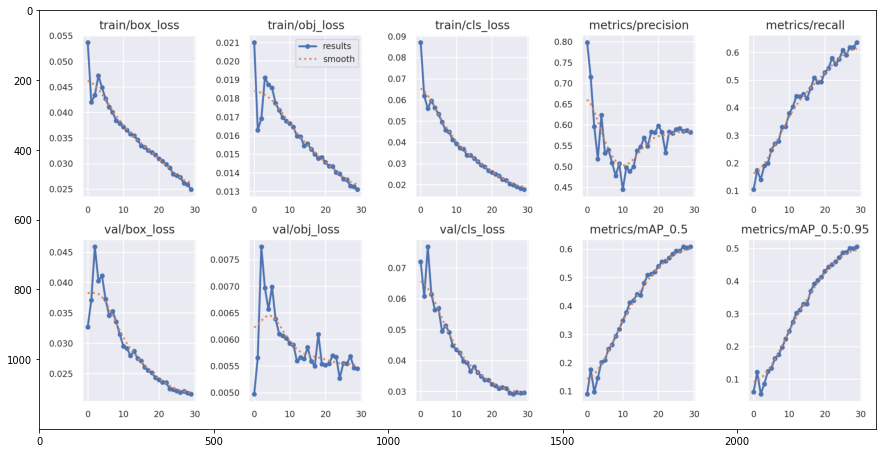

In [ ]:
img = mpimg.imread('runs/train/exp/results.png')
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

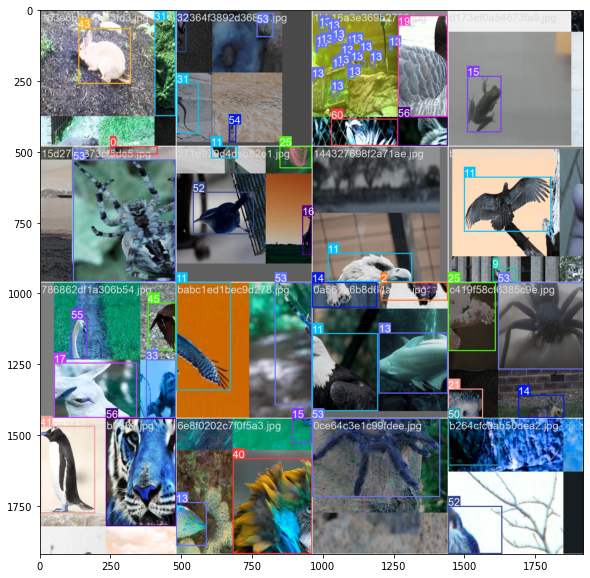

In [ ]:
img = mpimg.imread('runs/train/exp/train_batch0.jpg')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

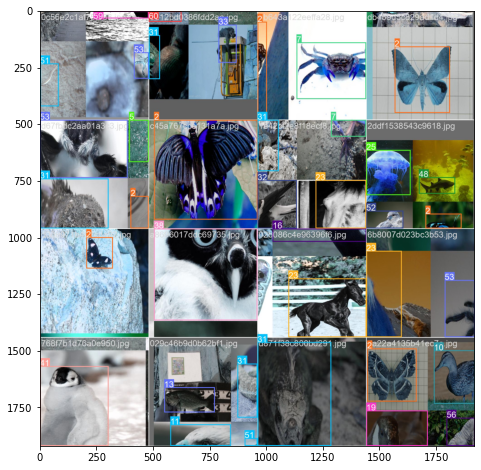

In [ ]:
img = mpimg.imread('runs/train/exp/train_batch1.jpg')
figure_size = 8
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

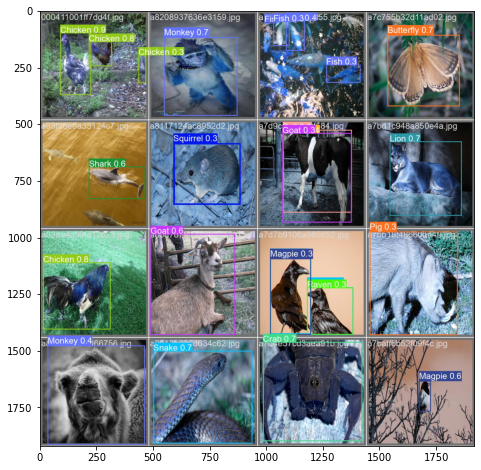

In [ ]:
img = mpimg.imread('runs/train/exp/val_batch0_pred.jpg')
figure_size = 8
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

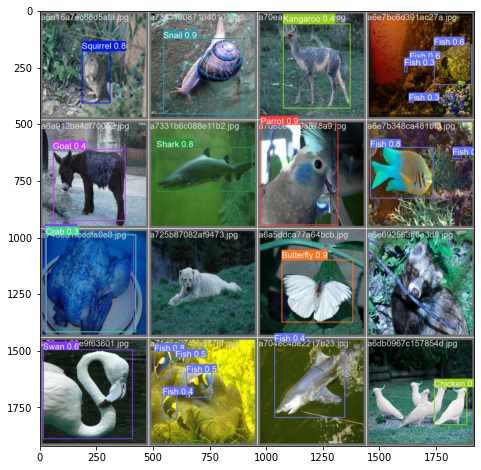

In [ ]:
img = mpimg.imread('runs/train/exp/val_batch1_pred.jpg')
figure_size = 8
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

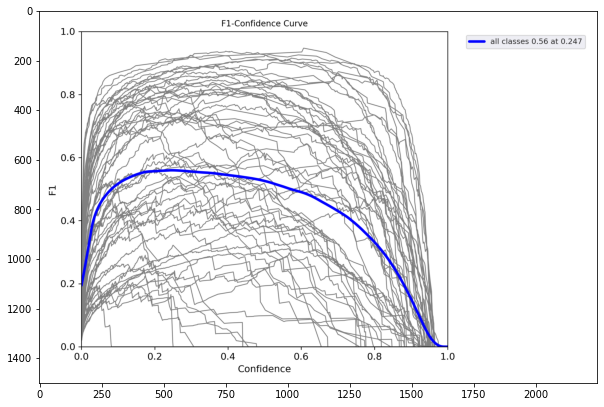

In [ ]:
img = mpimg.imread('runs/train/exp/F1_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

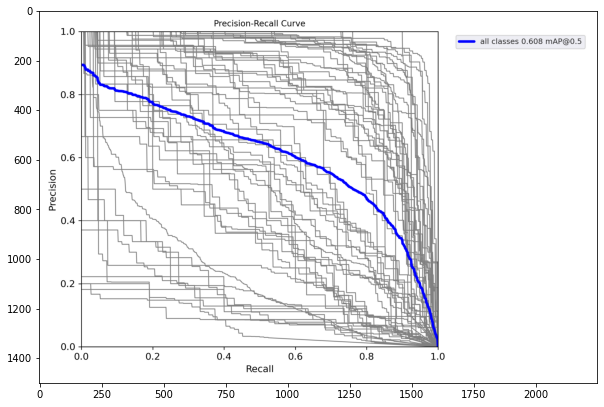

In [ ]:
img = mpimg.imread('runs/train/exp/PR_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()

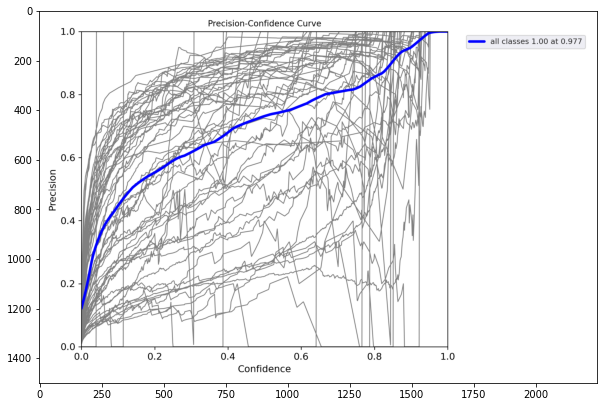

In [ ]:
img = mpimg.imread('runs/train/exp/P_curve.png')
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
imgplot = plt.imshow(img)
plt.show()